# Function Transformer

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv("Online Sales Data.csv")
dataset.head(3)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001.0,01-01-2024,NaN,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002.0,02-01-2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003.0,03-01-2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card


In [3]:
dataset.isnull().sum()

Transaction ID      1
Date                0
Product Category    4
Product Name        1
Units Sold          2
Unit Price          2
Total Revenue       1
Region              2
Payment Method      1
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_18628\2059017222.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total Revenue"])


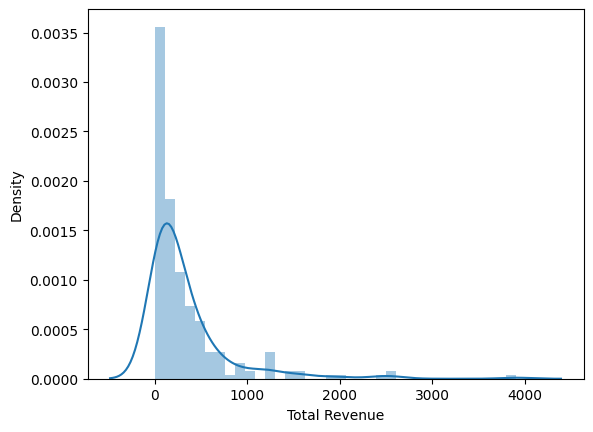

In [6]:
sns.distplot(dataset["Total Revenue"])
plt.show()

In [7]:
q1 = dataset["Total Revenue"].quantile(0.25)
q3 = dataset["Total Revenue"].quantile(0.75)
IQR = q3-q1

In [8]:
min_r = q1-(1.5*IQR)
max_r = q3+(1.5*IQR)
min_r , max_r

(-444.25, 905.6700000000001)

In [10]:
dataset = dataset[dataset["Total Revenue"] <= max_r]

C:\Users\HP\AppData\Local\Temp\ipykernel_18628\2059017222.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total Revenue"])


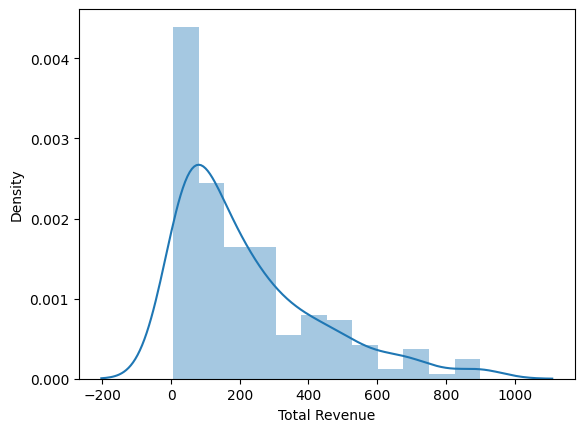

In [11]:
sns.distplot(dataset["Total Revenue"])
plt.show()

In [12]:
from sklearn.preprocessing import FunctionTransformer

In [15]:
ft = FunctionTransformer(func = np.log1p)
ft.fit(dataset[["Total Revenue"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [18]:
dataset["Total Revenue_tf"] = ft.transform(dataset[["Total Revenue"]])

C:\Users\HP\AppData\Local\Temp\ipykernel_18628\2908582669.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total Revenue"])
C:\Users\HP\AppData\Local\Temp\ipykernel_18628\2908582669.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total Revenue_tf"])


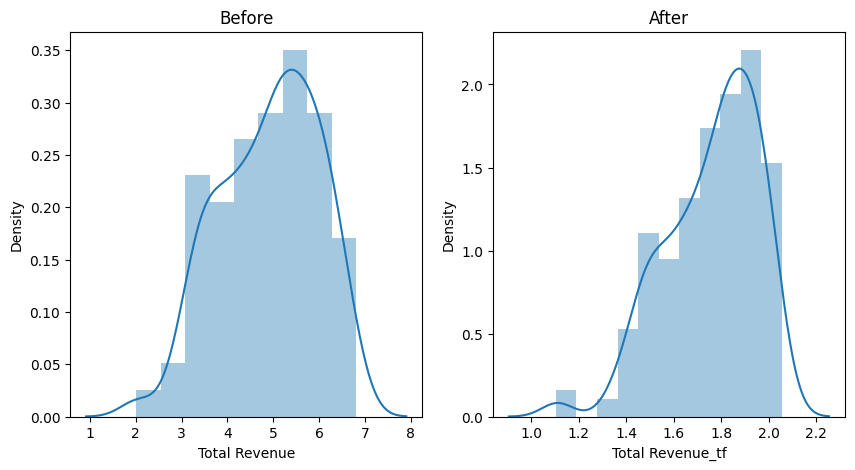

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(dataset["Total Revenue"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["Total Revenue_tf"])
plt.title("After")

plt.show()